## Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

## Data

In [3]:
df = pd.read_csv("dataframe_.csv")

In [4]:
df.head()

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214


## Data Analysis

In [5]:
df.shape

(1697, 2)

In [6]:
df.sample(5)

,input,output
1584,-125.366669,-106.000000
1501,66.469086,-6.151725
309,72.041717,11.947285
1078,-125.366669,131.000000
214,4.633331,-77.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1696 non-null   float64
 1   output  1696 non-null   float64
dtypes: float64(2)
memory usage: 26.6 KB


In [8]:
df.describe()

,input,output
count,1696.000000,1696.000000
mean,1.159933,-34.088017
std,79.005970,65.771112
min,-134.962839,-132.422167
25%,-63.386506,-80.026767
50%,10.195194,-50.470981
75%,70.264109,-11.000000
max,134.605775,134.425495


In [10]:
df.isnull().sum()

input     1
output    1
dtype: int64

In [11]:
df = df.dropna(axis = 0, how = 'all')

In [12]:
df.isnull().sum()

input     0
output    0
dtype: int64

In [13]:
df.duplicated().sum()

606

In [14]:
df = df.drop_duplicates()

In [15]:
df.duplicated().sum()

0

In [16]:
df.corr()

,input,output
input,1.000000,0.504471
output,0.504471,1.000000


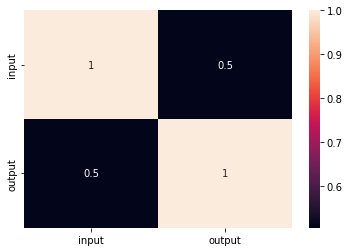

In [17]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [18]:
df.cov()

,input,output
input,6204.586968,2716.879936
output,2716.879936,4674.716079


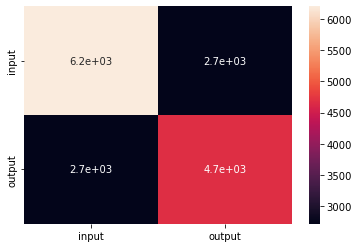

In [19]:
sns.heatmap(df.cov(),annot=True)
plt.show()

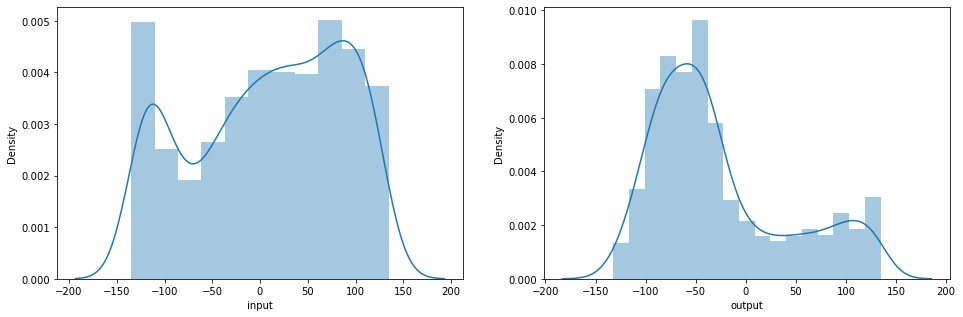

In [20]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['input'])
plt.subplot(1,2,2)
sns.distplot(df['output'])
plt.show()

## Outliers Detection

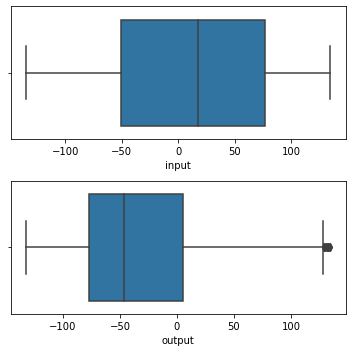

In [21]:
# Outlier Analysis
fig, axs = plt.subplots(2, figsize = (5,5))
plt1 = sns.boxplot(df['input'], ax = axs[0])
plt2 = sns.boxplot(df['output'], ax = axs[1])
plt.tight_layout()

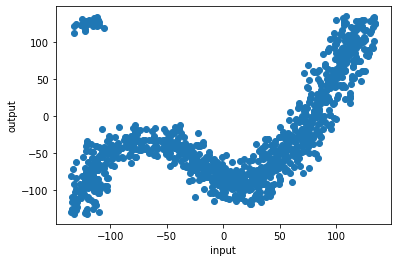

In [22]:
%matplotlib inline
plt.xlabel('input')
plt.ylabel('output')
plt.scatter(df.input,df.output)

In [23]:
ndf = df.copy()

In [24]:
ndf['zscore'] = ( df.input - df.input.mean() ) / df.input.std()
ndf.head(5)

,input,output,zscore
0,-122.740667,-130.572085,-1.661269
1,-121.531419,-129.938929,-1.645917
2,-134.917019,-130.141832,-1.815852
3,-120.605951,-125.760932,-1.634168
4,-129.894781,-112.785214,-1.752093


In [25]:
df_no_outliers = ndf[(ndf.zscore>-3) & (ndf.zscore<3)]
df_no_outliers.head()

,input,output,zscore
0,-122.740667,-130.572085,-1.661269
1,-121.531419,-129.938929,-1.645917
2,-134.917019,-130.141832,-1.815852
3,-120.605951,-125.760932,-1.634168
4,-129.894781,-112.785214,-1.752093


In [26]:
upper_limit = df.input.mean() + 3*df.input.std()
upper_limit

244.42378732487785

In [27]:
lower_limit = df.input.mean() -3*df.input.std()
lower_limit

-228.1914164705514

In [28]:
df[(df.input>upper_limit) | (df.input<lower_limit)]

,input,output


There are no outliers present

In [29]:
ndf = df_no_outliers

In [30]:
ndf.shape

(1090, 3)

## Feature Selection

In [31]:
x = df.drop('output',axis=1)
y = df.output

In [32]:
x

,input
0,-122.740667
1,-121.531419
2,-134.917019
3,-120.605951
4,-129.894781
...,...
1105,-112.018496
1107,-119.954237
1108,-109.942155
1109,-111.515368


In [33]:
y

0      -130.572085
1      -129.938929
2      -130.141832
3      -125.760932
4      -112.785214
           ...    
1105    121.096397
1107    123.609122
1108    127.197394
1109    128.170885
1110    123.087950
Name: output, Length: 1090, dtype: float64

In [34]:
x.shape

(1090, 1)

In [35]:
y.shape

(1090,)

## Linear Regression

In [36]:
model = LinearRegression()

In [37]:
model.fit(x,y)

LinearRegression()

In [38]:
model.coef_

array([0.43788248])

In [39]:
model.intercept_

-30.937563632729766

In [40]:
model.predict([[80]])

array([4.09303486])

80*0.43788248 + -30.937563632729766

In [41]:
# Evaluate the model's performance
mean_squared_error(y,model.predict(x))

3481.844665237579

## Feature Engineering

## polynomial Regression

In [42]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(x)

In [43]:
reg = LinearRegression().fit(X_poly, y)

In [44]:
reg

LinearRegression()

In [45]:
reg.intercept_

-76.02986996015048

In [46]:
reg.coef_

array([0.        , 0.48124065, 0.00714159])

## Decision Tree

In [47]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,roc_curve

from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

In [48]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [49]:
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

In [50]:
y_pred = regressor.predict(x_test)

In [51]:
# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 2697.2487920093545


##  Support Vector Regression

In [52]:
from sklearn.svm import SVR

In [53]:
sv_regressor = SVR(kernel='linear')
sv_regressor.fit(x_train, y_train)

SVR(kernel='linear')

In [54]:
y_pred2 = sv_regressor.predict(x_test)

In [55]:
# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred2)
print("Mean Squared Error:", mse)

Mean Squared Error: 3688.3354157637837


## Finding the best model

Use appropriate evaluation metrics and compare all the models and write your observations i.e. why is one model better than the other?


In [56]:
from lazypredict.Supervised import LazyRegressor

In [57]:
reg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None )
models,predictions = reg.fit(x_train, x_test, y_train, y_test)

 24%|███████████████████▌                                                              | 10/42 [00:00<00:01, 22.48it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 71%|██████████████████████████████████████████████████████████▌                       | 30/42 [00:02<00:00, 12.85it/s]

OrthogonalMatchingPursuitCV model failed to execute
Found array with 1 feature(s) (shape=(872, 1)) while a minimum of 2 is required by OrthogonalMatchingPursuitCV.
PoissonRegressor model failed to execute
Some value(s) of y are out of the valid range for family PoissonDistribution


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:12<00:00,  3.30it/s]


In [58]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
GaussianProcessRegressor,0.65,0.65,39.98,0.09
LGBMRegressor,0.64,0.64,40.76,0.10
HistGradientBoostingRegressor,0.62,0.62,41.49,0.72
SVR,0.62,0.62,41.82,0.11
GradientBoostingRegressor,0.61,0.61,42.32,0.07
AdaBoostRegressor,0.60,0.60,42.83,0.04
NuSVR,0.60,0.60,42.94,0.08
KNeighborsRegressor,0.57,0.57,44.47,0.02
RandomForestRegressor,0.54,0.54,45.79,0.23


Hence,

GaussianProcessRegressor	

LGBMRegressor

SVR	

These are the Top 3 models that provides high accuracy for this data

## Hyperparameter Tuning

In [59]:
# Define the hyperparameters to tune
param_grid = {'fit_intercept': [True, False], 'normalize': [True, False]}


In [60]:
# Train the linear regression model using grid search with cross-validation
regressor = LinearRegression()
grid_search = GridSearchCV(regressor, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False],
                         'normalize': [True, False]},
             scoring='neg_mean_squared_error')

In [61]:
# Print the best hyperparameters and the corresponding mean squared error
print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'fit_intercept': True, 'normalize': True}


In [62]:
y_pred = grid_search.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 3587.669110752899
